# Weighted

In [ ]:
from tool.functions import *
from tool.eval2 import *

In [ ]:
def get_weight():
    weights = {}
    with open('./files/stats.csv', 'r', encoding = 'utf-8') as inp:
        for line in inp:
            data = line.split()
            weights[data[0]+'-'+data[1]] = 1/log10(10 + float(data[2]) + 0.5 * float(data[3]))
            weights[data[1]+'-'+data[0]] = 1/log10(10 + float(data[2]) + 0.5 * float(data[4]))
    with open('./files/weights','w',encoding='utf-8') as outp:
        json.dump(weights, outp)

In [ ]:
def weighted_path_length(path):
    global weights
    length = 0
    for key, value in enumerate(path[1:]):
        length += weights[path[key].lang+'-'+value.lang]
    #print (length)
    return exp(-length)

In [ ]:
def metric(G, word, translation, cutoff, mode='exp'):
    coef = 0
    if mode in ('exp', 'len'):
        t = Counter([len(i) for i in nx.all_simple_paths(G, word, translation, cutoff=cutoff)])
        if mode == 'exp': 
            for i in t: 
                coef += exp(-i)*t[i]
            return coef
        if mode == 'len':
            for i in t: 
                coef += t[i]*i
            return coef
    if mode in ('exp-len'):
        for path in nx.all_simple_paths(G, word, translation, cutoff=5):
            coef += weighted_path_length(path)

In [ ]:
get_weight()

In [ ]:
%timeit with open ('./files/weights','r') as inp: weights = json.load(inp)

In [ ]:
with open ('./files/weights','r') as inp: weights = json.load(inp)

In [ ]:
list(weights.items())[-10:]

In [ ]:
lang1, lang2, n = 'eng','spa', 10
%time get_relevant_languages(lang1, lang2)
%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

In [ ]:
%time print_lemma_results(lemma_search (G, 'star', l1, 'spa', 4, 40, metric='exp-len'), n = 5)

In [ ]:
lang1, lang2, n = 'eng','spa', 10

In [ ]:
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5, metric='exp-len')

In [ ]:
lang1, lang2, n = 'eng','spa', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)#, metric='exp-len')

In [ ]:
lang1, lang2, n = 'rus','ukr', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)# metric='exp-len')

In [ ]:
lang1, lang2, n = 'rus','pol', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)# metric='exp-len')

In [27]:
%time s = get_evaluation_pairs(G, l1, lang2, n=1000)

Wall time: 937 ms


In [28]:
u, v = s[0][0], s[0][1]
u,v

(eng$Domeciano$[np-ant_np_np-ant-m-sg], spa$Domeciano$[np-ant])

In [30]:
H = nx.DiGraph()
for path in nx.all_simple_paths(G, u, v, cutoff=5):
    H.add_path(path)

eng$manufacturer$[n_n-sg] spa$fabricante$[n-mf_n_n-mf-sg]


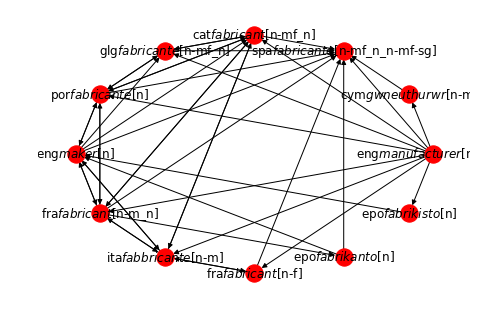

In [19]:
print (u, v)
nx.draw_shell(H, with_labels = True)

eng$radiotherapy$[n] spa$radioterapia$[n_n-f]


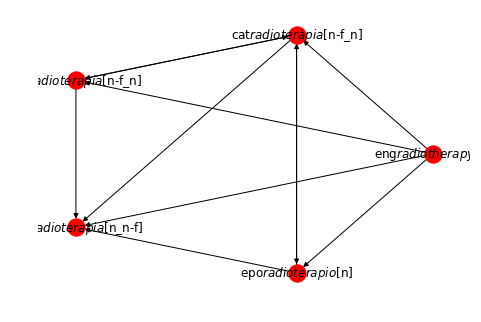

In [26]:
print (u, v)
nx.draw_shell(H, with_labels = True)

eng$Domeciano$[np-ant_np_np-ant-m-sg] spa$Domeciano$[np-ant]


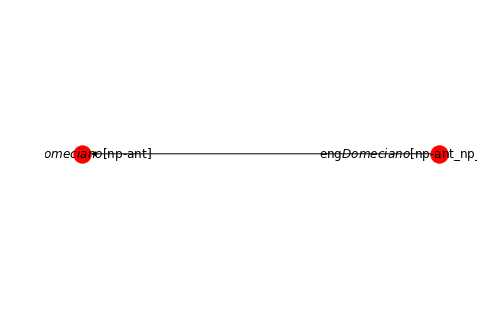

In [31]:
print (u, v)
nx.draw_shell(H, with_labels = True)

# Changed variant search

In [1]:
from tool.functions import *
from tool.evaluation import *

In [ ]:
lang1, lang2, n = 'eng','spa', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

1000
Precision : 0.9671232876712329, recall : 0.706, f1-score : 0.8161849710982657
1000
Precision : 0.9614325068870524, recall : 0.698, f1-score : 0.8088064889918887


In [ ]:
lang1, lang2, n = 'bel','rus', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

In [ ]:
lang1, lang2 = 'kaz','rus'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

In [ ]:
lang1, lang2 = 'urd','hin'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

In [ ]:
lang1, lang2 = 'urd','hin'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=1)

In [ ]:
lang1, lang2, n = 'bel','rus', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=1)

In [ ]:
lang1, lang2 = 'kaz','rus'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=1)

In [3]:
lang1, lang2, n = 'bel','rus', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

Precision : 0.9713114754098361, recall : 0.8943396226415095, f1-score : 0.9312377210216112
Precision : 0.9545454545454546, recall : 0.8816793893129771, f1-score : 0.9166666666666667
Precision : 0.9469026548672567, recall : 0.84251968503937, f1-score : 0.8916666666666666

Wall time: 3min 18s


In [1]:
from tool.func2 import *
from tool.eval3 import *

In [2]:
lang1, lang2, n = 'eng','spa', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

Precision : 0.9545454545454546, recall : 0.693, f1-score : 0.8030127462340672
Precision : 0.9645203679369251, recall : 0.734, f1-score : 0.833617262918796
Precision : 0.9452054794520548, recall : 0.69, f1-score : 0.7976878612716762

Wall time: 7min 50s


In [3]:
lang1, lang2, n = 'bel','rus', 10
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

Precision : 0.9583333333333334, recall : 0.8971631205673759, f1-score : 0.9267399267399268
Precision : 0.9758064516129032, recall : 0.9201520912547528, f1-score : 0.9471624266144815
Precision : 0.9555555555555556, recall : 0.8739837398373984, f1-score : 0.9129511677282378

Wall time: 3min 15s


In [4]:
lang1, lang2 = 'kaz','rus'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

Precision : 0.8087167070217918, recall : 0.334, f1-score : 0.4727530077848549
Precision : 0.8597701149425288, recall : 0.374, f1-score : 0.521254355400697
Precision : 0.7754137115839244, recall : 0.328, f1-score : 0.460997891777934

Wall time: 3min 49s


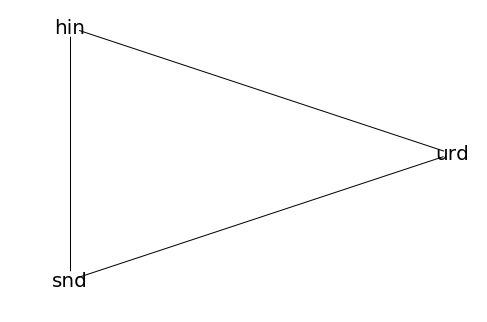

In [2]:
lang1, lang2 = 'urd','hin'
get_relevant_languages(lang1, lang2)
check_graph(lang1, lang2)

In [3]:
lang1, lang2 = 'urd','hin'
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

1000
Precision : 0.9989939637826962, recall : 0.993, f1-score : 0.995987963891675
1000
Precision : 0.998992950654582, recall : 0.992, f1-score : 0.9954841946813848
1000
Precision : 1.0, recall : 0.994, f1-score : 0.9969909729187563

Wall time: 5.93 s


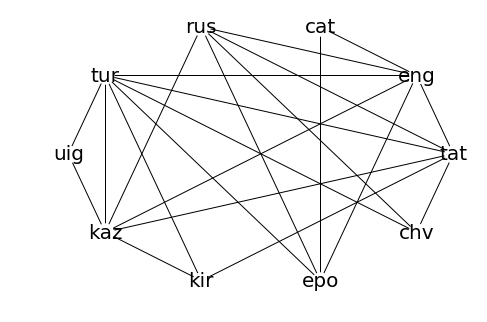

In [2]:
lang1, lang2 = 'tur','tat'
get_relevant_languages(lang1, lang2)
check_graph(lang1, lang2)

In [3]:
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)

259
Precision : 0.7, recall : 0.3783783783783784, f1-score : 0.4912280701754387
243
Precision : 0.8211382113821138, recall : 0.4156378600823045, f1-score : 0.551912568306011
234
Precision : 0.7703703703703704, recall : 0.4444444444444444, f1-score : 0.5636856368563686

Wall time: 2min 57s


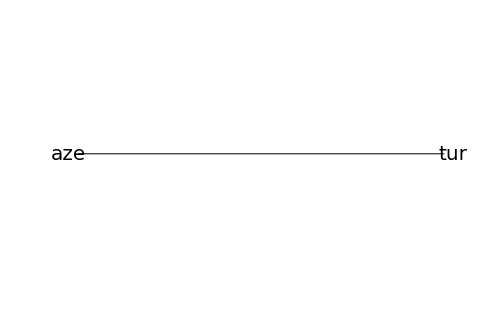

In [6]:
lang1, lang2 = 'tur','aze'
get_relevant_languages(lang1, lang2)
check_graph(lang1, lang2)

In [7]:
%time eval_loop(lang1, lang2, n=10, cutoff=4, n_iter=3, topn=5)


Wall time: 7.23 s


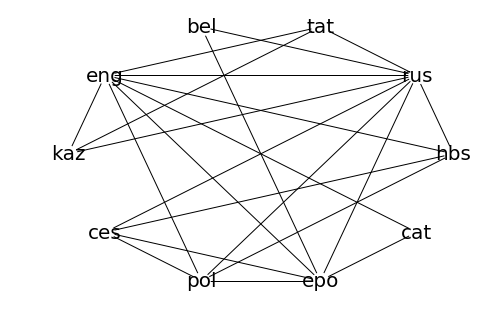

In [12]:
lang1, lang2 = 'bel','rus'
get_relevant_languages(lang1, lang2)
check_graph(lang1, lang2)

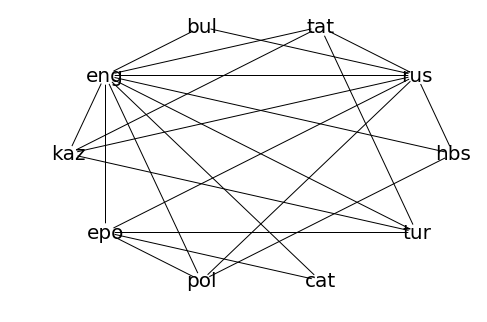

In [13]:
lang1, lang2 = 'kaz','rus'
get_relevant_languages(lang1, lang2)
check_graph(lang1, lang2)